In [ ]:
import pandas as pd
import psycopg2

# Connect to your PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="your_database_name",
    user="user_name",
    password="your_password"
)

# Write your SQL query
query = """
SELECT o."Region", m."Person" AS manager, ROUND(SUM(o."Sales")::numeric, 2) AS sales, ROUND(SUM(o."Profit")::numeric, 2) AS profit
FROM orders_staging o
    LEFT JOIN managers m ON o."Region" = m."Region"
GROUP BY
    o."Region",
    m."Person"
ORDER BY profit DESC;
"""

# Run query and load results into a DataFrame
df = pd.read_sql(query, conn)

# Save to CSV
df.to_csv(r"C:\Users\ochie\OneDrive\Desktop\D_Docs\superstore_performance_analysis\data\profit_by_region_manager.csv", index=False)

# Close connection
conn.close()

print("✅ Data exported successfully!")


✅ Data exported successfully!


C:\Users\ochie\AppData\Local\Temp\ipykernel_28964\1297854682.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv(r"C:\Users\ochie\OneDrive\Desktop\D_Docs\superstore_performance_analysis\data\profit_by_region_manager.csv", encoding="ISO-8859-1")
data.head()


,Region,manager,sales,profit
0,West,Anna Andreadi,725457.82,108418.45
1,East,Chuck Magee,678781.24,91522.78
2,South,Cassandra Brandow,391721.91,46749.43
3,Central,Kelly Williams,501239.89,39706.36


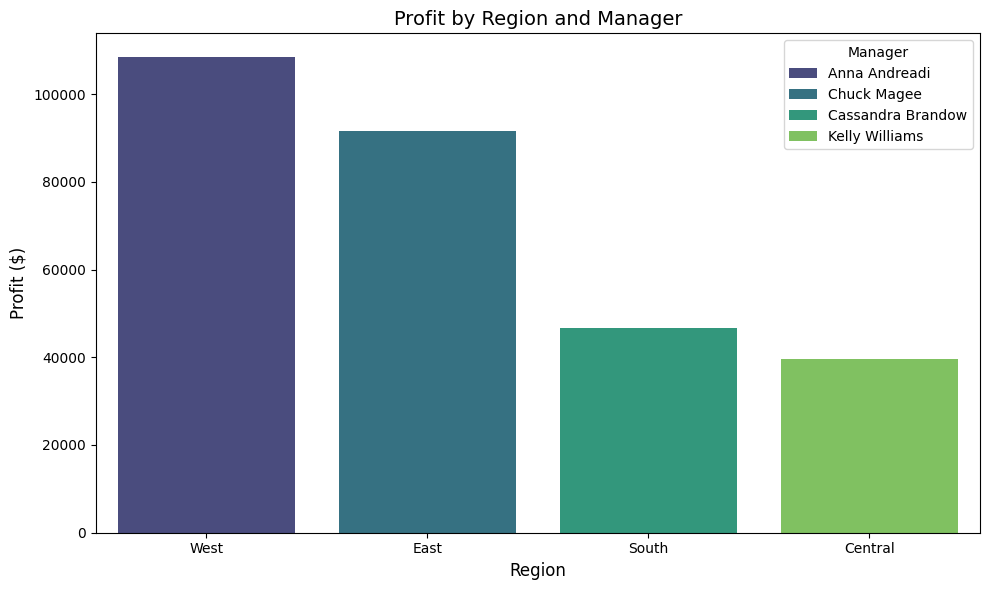

In [3]:
##Bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Region', y='profit', hue='manager', palette='viridis')

plt.title("Profit by Region and Manager", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)
plt.legend(title="Manager")
plt.tight_layout()
plt.show()


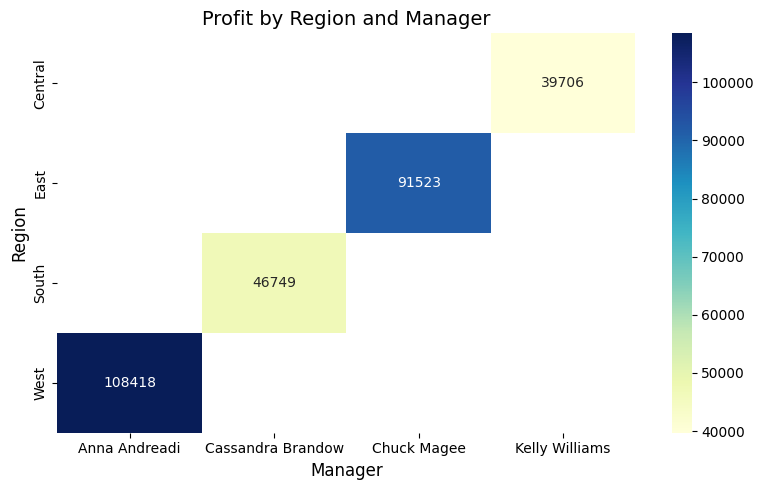

In [4]:
##Heatmap
# Pivot the data for heatmap
pivot = data.pivot(index='Region', columns='manager', values='profit')

plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Profit by Region and Manager", fontsize=14)
plt.xlabel("Manager", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.tight_layout()
plt.show()
